In [ ]:

import kagglehub
rashikrahmanpritom_heart_attack_analysis_prediction_dataset_path = kagglehub.dataset_download('rashikrahmanpritom/heart-attack-analysis-prediction-dataset')

print('Data source import complete.')


**DESCRIPTION**

        This dataset contains information about patients with heart disease. It includes information such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar levels, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak (ST depression induced by exercise relative to rest), slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thalassemia (a type of blood disorder), and the presence or absence of heart disease.

 Columns :
* index: Unique identifier for each row in the dataframe.
* age: Age of the patient.
* sex: Gender of the patient
* cp: Chest pain type
* trtbps: Resting blood pressure
* chol: Serum cholesterol in mg/dl.
* fbs: Fasting blood sugar
* restecg: Resting electrocardiographic results
* thalachh: Maximum heart rate achieved.
* exng: Exercise induced angina
* oldpeak: ST depression induced by exercise relative to rest.
* slp: Slope of the peak exercise ST segment
* caa: Number of major vessels
* thall: Thalassemia
* output: Diagnosis of heart disease (1 = true; 0 = false).

**IMPORTING LIBRARIES**

In [ ]:
!pip install colorama
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from colorama import Fore, init
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

**LOAD DATA**

In [ ]:
df = pd.read_csv("/content/01_District_wise_crimes_committed_IPC_2001_2012.csv")
df.head()

,index,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   index                                                9017 non-null   int64 
 1   STATE/UT                                             9017 non-null   object
 2   DISTRICT                                             9017 non-null   object
 3   YEAR                                                 9017 non-null   int64 
 4   MURDER                                               9017 non-null   int64 
 5   ATTEMPT TO MURDER                                    9017 non-null   int64 
 6   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 7   RAPE                                                 9017 non-null   int64 
 8   CUSTODIAL RAPE                                       9017 non-null   int64 
 9

In [ ]:
  df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(f"Summary Of The Dataset with numerical columns :")
df.describe()

Summary Of The Dataset with numerical columns :


,index,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,4508.000000,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,2603.128022,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,0.000000,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2254.000000,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,4508.000000,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,6762.000000,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,9016.000000,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

index: 9017 distinct values
STATE/UT: 35 distinct values
DISTRICT: 808 distinct values
YEAR: 12 distinct values
MURDER: 477 distinct values
ATTEMPT TO MURDER: 514 distinct values
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER: 171 distinct values
RAPE: 420 distinct values
CUSTODIAL RAPE: 5 distinct values
OTHER RAPE: 419 distinct values
KIDNAPPING & ABDUCTION: 534 distinct values
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS: 460 distinct values
KIDNAPPING AND ABDUCTION OF OTHERS: 307 distinct values
DACOITY: 227 distinct values
PREPARATION AND ASSEMBLY FOR DACOITY: 191 distinct values
ROBBERY: 455 distinct values
BURGLARY: 922 distinct values
THEFT: 1751 distinct values
AUTO THEFT: 1114 distinct values
OTHER THEFT: 1343 distinct values
RIOTS: 804 distinct values
CRIMINAL BREACH OF TRUST: 411 distinct values
CHEATING: 824 distinct values
COUNTERFIETING: 167 distinct values
ARSON: 295 distinct values
HURT/GREVIOUS HURT: 1855 distinct values
DOWRY DEATHS: 256 distinct values
ASSAULT ON WOMEN WI

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        4. Exploration Data
    </p>
</div>


In [ ]:
df_numericals = df.select_dtypes(['int64','float64'])
numericals = [i for i in df_numericals.columns]
print('numericals: ', numericals)

numericals:  ['index', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        4.1 Visualization
    </p>
</div>


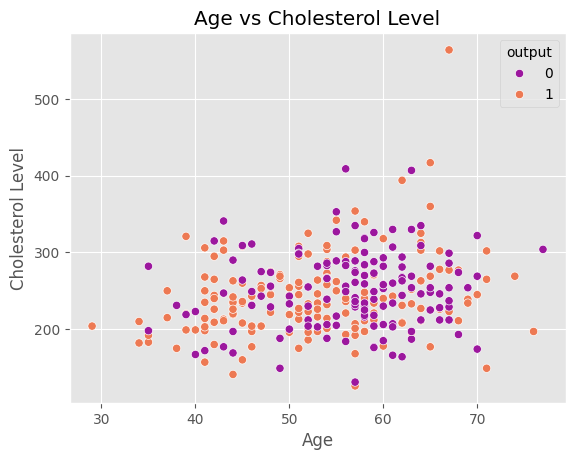

In [ ]:
sns.scatterplot(x='age', y='chol', hue='output', data=df,palette='plasma')
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

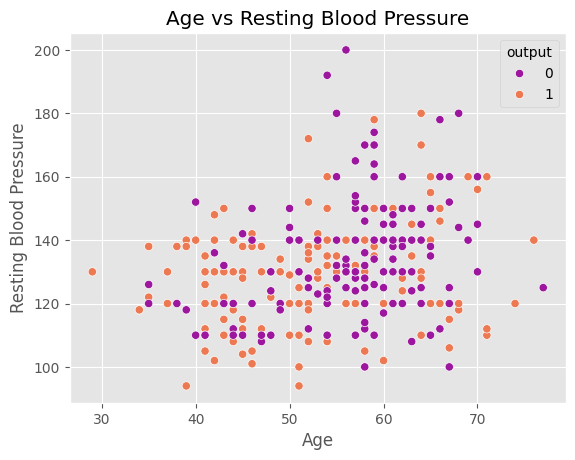

In [ ]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df,palette='plasma')
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

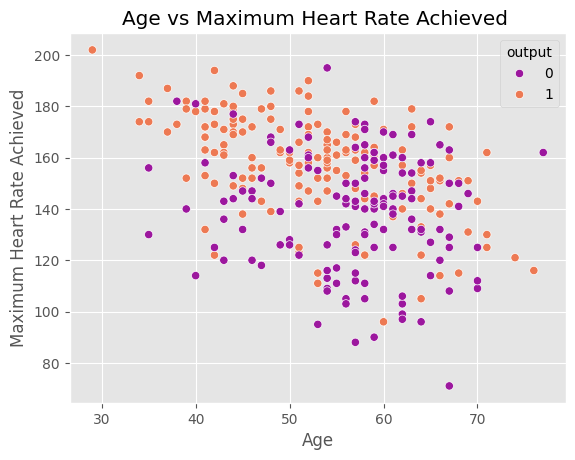

In [ ]:
sns.scatterplot(x='age', y='thalachh', hue='output', data=df,palette='plasma' )
plt.title('Age vs Maximum Heart Rate Achieved ')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

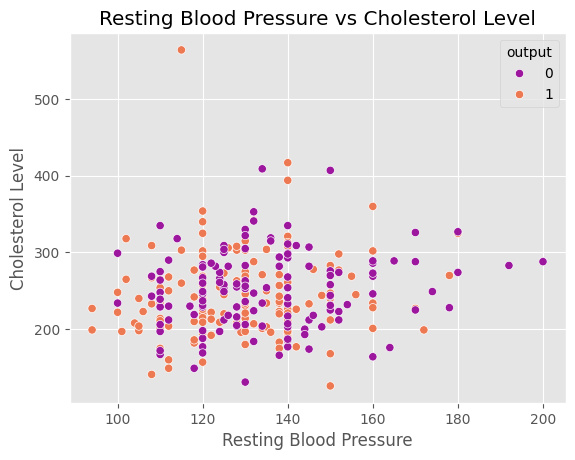

In [ ]:
sns.scatterplot(x='trtbps', y='chol', hue='output', data=df,palette='plasma' )
plt.title('Resting Blood Pressure vs Cholesterol Level')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol Level')
plt.show()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        4.2 Correlation Matrix
    </p>
</div>


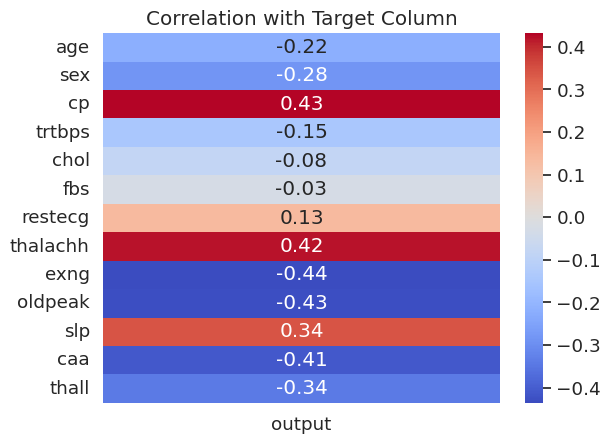

In [ ]:
corr = df.corr()

target_corr = corr['output'].drop('output')

sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        5.Data Preparation
    </p>
</div>


In [ ]:
df1 = df.copy()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        5.1 Imbalanced Data
    </p>
</div>


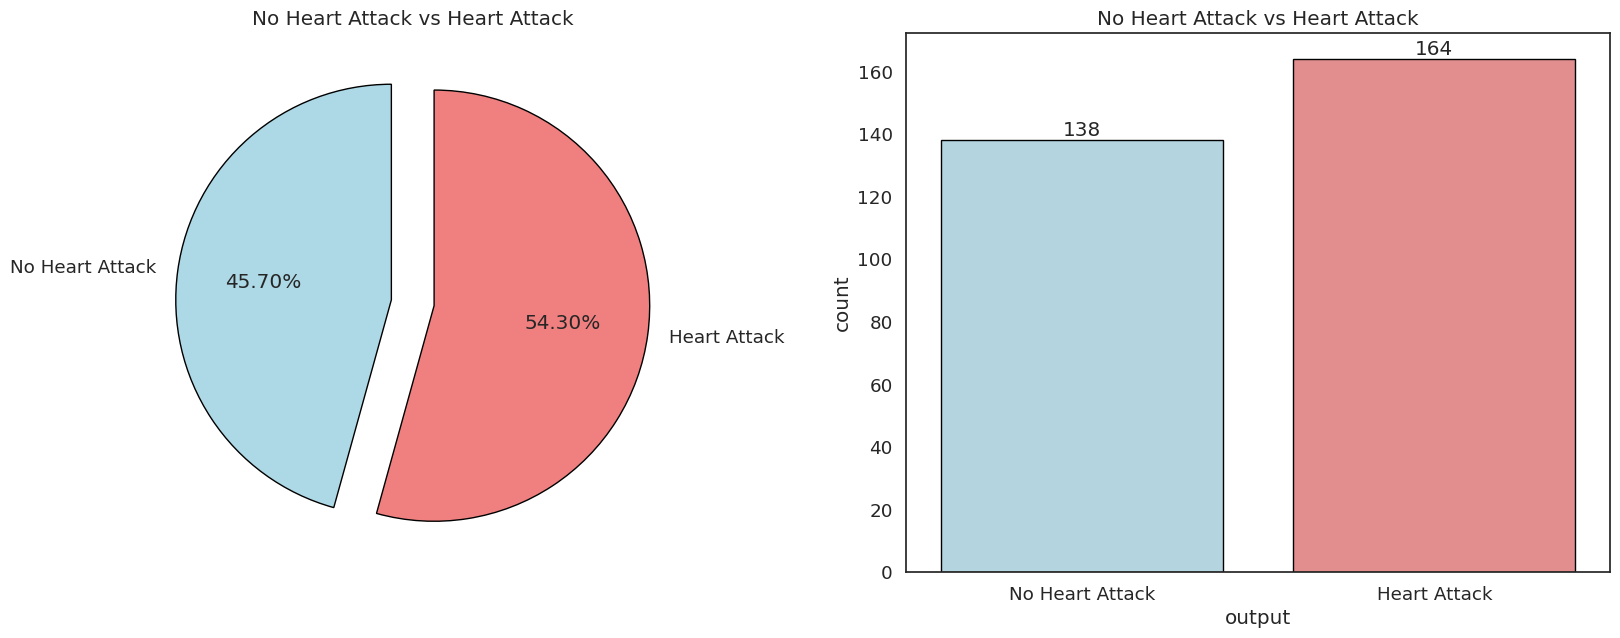

In [ ]:
palette = ["#FF0000", "#0000FF"]

Diabetes_count = df1['output'].value_counts()[1]
No_Diabetes_count = df1['output'].value_counts()[0]
total_count = len(df)
diabetes_percentage = (Diabetes_count / total_count) * 100
no_diabetes_percentage = (No_Diabetes_count / total_count) * 100

pie_values = [no_diabetes_percentage, diabetes_percentage]

colors = ['lightblue', 'lightcoral']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
# First subplot - Pie chart
plt.subplot(1, 2, 1)
plt.pie(pie_values, labels=['No Heart Attack', 'Heart Attack'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,  # Use the defined colors
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('No Heart Attack vs Heart Attack')

# Second subplot - Countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df,
                x='output',
                palette=colors,  # Use the defined colors
                edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
ax.set_xticks([0, 1])  # Set ticks manually to match the categories
ax.set_xticklabels(['No Heart Attack', 'Heart Attack'])

plt.title('No Heart Attack vs Heart Attack')
plt.show()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        5.2 Outliers
    </p>
</div>


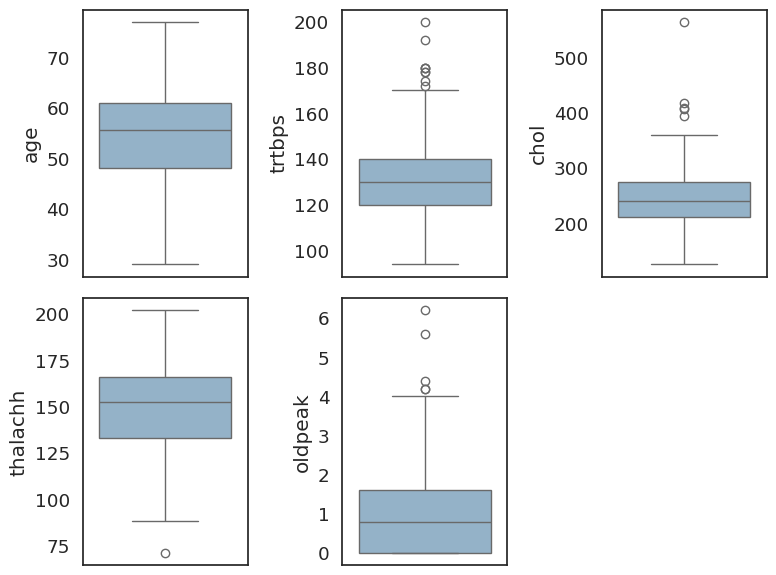

In [ ]:
numerical_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df1[column])

plt.tight_layout()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        RobustScaler
    </p>
</div>


In [ ]:
features_to_scale_robust = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


robust_scaler = RobustScaler()

df1[features_to_scale_robust] = robust_scaler.fit_transform(df1[features_to_scale_robust])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in features_to_scale_robust:
    num_outliers = count_outliers(df1[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')


Number of outliers in age: 0
Number of outliers in trtbps: 9
Number of outliers in chol: 5
Number of outliers in thalachh: 1
Number of outliers in oldpeak: 5


In [ ]:
X = df1.drop('output', axis=1)
y = df1['output']

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 20px; font-weight: bold;">
        6. Modeling
    </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 1 : Logistic Regression   
    </p>
</div>


In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[25  7]
 [ 6 28]]


Accuracy of Logistic Regression: 80.3030303030303 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.80      0.82      0.81        34

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 2 : Naive Bayes   
    </p>
</div>


In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[24  8]
 [ 5 29]]


Accuracy of Naive Bayes model: 80.3030303030303 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.78      0.85      0.82        34

    accuracy                           0.80        66
   macro avg       0.81      0.80      0.80        66
weighted avg       0.81      0.80      0.80        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 3 : Random Forest Classfier   
    </p>
</div>


In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[27  5]
 [ 4 30]]


Accuracy of Random Forest: 86.36363636363636 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.86      0.88      0.87        34

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 4 : Extreme Gradient Boost    
    </p>
</div>


In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[25  7]
 [ 4 30]]


Accuracy of Extreme Gradient Boost: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.81      0.88      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 5 : K-NeighborsClassifier
    </p>
</div>


In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[29  3]
 [10 24]]


Accuracy of K-NeighborsClassifier: 80.3030303030303 

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.89      0.71      0.79        34

    accuracy                           0.80        66
   macro avg       0.82      0.81      0.80        66
weighted avg       0.82      0.80      0.80        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 6 : DecisionTreeClassifier
    </p>
</div>


In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[27  5]
 [10 24]]


Accuracy of DecisionTreeClassifier: 77.27272727272727 

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.83      0.71      0.76        34

    accuracy                           0.77        66
   macro avg       0.78      0.77      0.77        66
weighted avg       0.78      0.77      0.77        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
      Model 7 : Support Vector Classifier
    </p>
</div>


In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[27  5]
 [ 6 28]]


Accuracy of Support Vector Classifier: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.85      0.82      0.84        34

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66



<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.1 Classification Report
    </p>
</div>


In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score,
                    nb_acc_score,rf_acc_score,xgb_acc_score,knn_acc_score,dt_acc_score,svc_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.803030
1,Naive Bayes,0.803030
2,Random Forest,0.863636
3,Extreme Gradient Boost,0.833333
4,K-Nearest Neighbour,0.803030
5,Decision Tree,0.772727
6,Support Vector Machine,0.833333


<div style="background-color: white; padding: 10px; border-radius: 5px; color: #0000FF;">
    <p style="font-size: 16px; font-weight: bold;">
        Best Model is Random Forest : 0.86
   </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.2 Hyperparameters Grid Search
    </p>
</div>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


rf_best = grid_search.best_estimator_
y_pred = rf_best.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<div style="background-color: white; padding: 10px; border-radius: 5px; color: #0000FF;">
    <p style="font-size: 16px; font-weight: bold;">
        Tuning Hyperparameters Random Forest : 0.92
   </p>
</div>


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.3 Confusion Matrix
    </p>
</div>


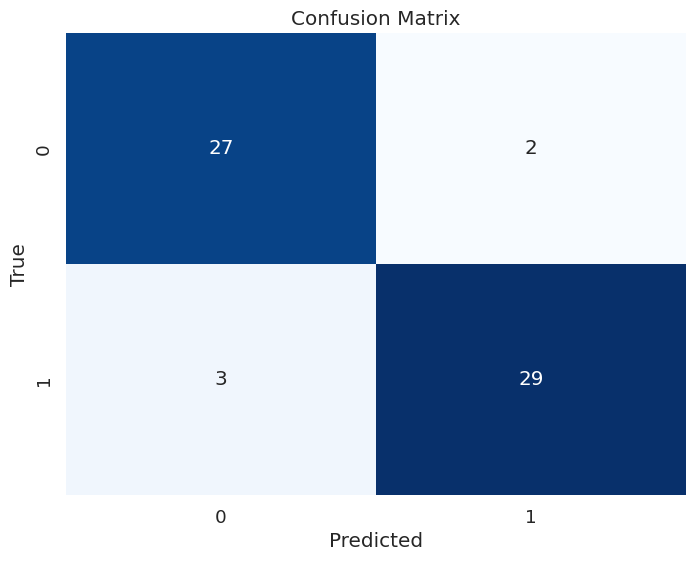

In [ ]:
y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.4 Receiver Operator Characteristic (ROC)
    </p>
</div>


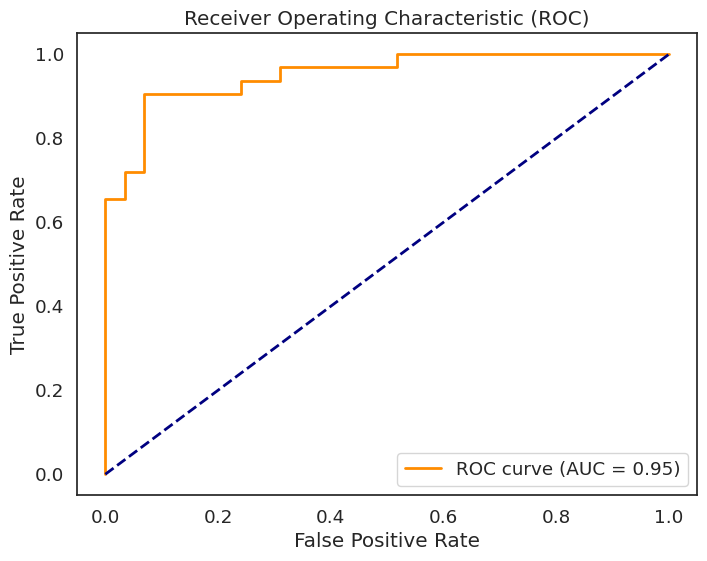

In [ ]:
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

* 0.90 - 1.00 = excellent
* 0.80 - 0.90 = good
* 0.70 - 0.80 = fair
* 0.60 - 0.70 = poor
* 0.50 - 0.60 = fail

<div style="background-color: purple; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 16px; font-weight: bold;">
        6.5 Features Importance
    </p>
</div>


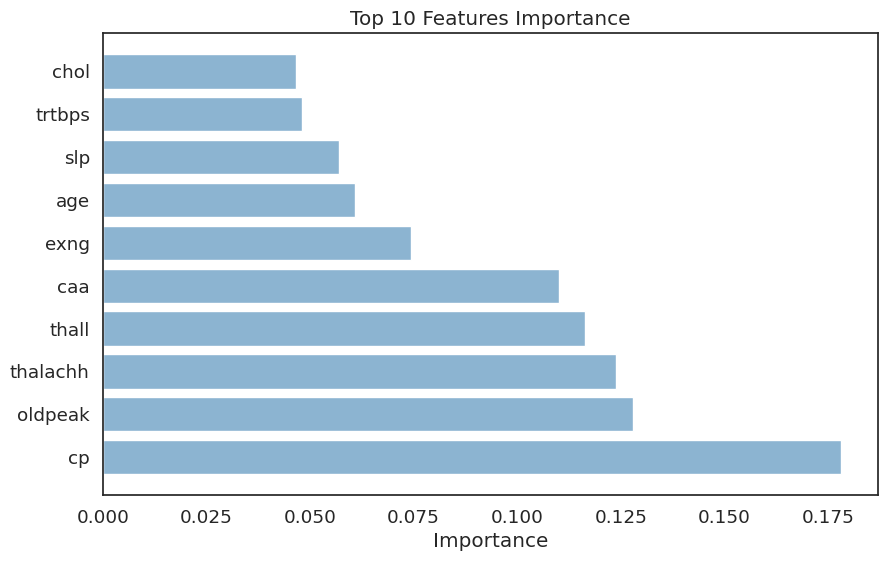

Feature Importance:
     Feature  Importance
2         cp    0.178243
9    oldpeak    0.127916
7   thalachh    0.123869
12     thall    0.116385
11       caa    0.110148


In [ ]:
rf_best.fit(X, y)

feature_importances = rf_best.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Features Importance')
plt.show()


print("Feature Importance:")
print(feature_importance_df.head())

